# PART 2

In [104]:
import glob
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX
from scipy.stats import normaltest
import pmdarima as pm

In [105]:
# path = 'C:\\Users\\ASUS\\Desktop\\423ProjectPart2\\data'
path = 'C:\\Users\\EylülRanaSaraç\\OneDrive - boun.edu.tr\\Masaüstü\\IE 423\\Project Part 2\\golden-girlz\\ProjectPart2\\20180101_20231121_bist30'

all_files = glob.glob(path + "/*_bist30.csv")

specified_files = [
    "20180101_20180401_bist30.csv", "20180402_20180701_bist30.csv",
    "20180702_20180930_bist30.csv", "20181001_20181230_bist30.csv",
    "20181231_20190331_bist30.csv", "20190401_20190630_bist30.csv",
    "20190701_20190929_bist30.csv", "20190930_20191229_bist30.csv",
    "20191230_20200329_bist30.csv", "20200330_20200628_bist30.csv",
    "20200629_20200927_bist30.csv", "20200928_20201227_bist30.csv"
]

# Filter files based on specified file dates
files_2018_to_2021 = [file for file in all_files if any(spec_file in file for spec_file in specified_files)]

# Loop through file paths to combine the data
combined_data_AKBNK = pd.DataFrame()
combined_data_GARAN = pd.DataFrame()

for file_path in files_2018_to_2021:
    # Read the file and set the 'timestamp' column as the index by converting it to a datetime object
    # After reading the data, set the frequency to hourly
    data = pd.read_csv(file_path, parse_dates=['timestamp'], index_col='timestamp')


    akbnk_data = data[data['short_name'] == 'AKBNK']
    garan_data = data[data['short_name'] == 'GARAN']

    # Concatenate the data
    combined_data_AKBNK = pd.concat([combined_data_AKBNK, akbnk_data])
    combined_data_GARAN = pd.concat([combined_data_GARAN, garan_data])


#### Stationarity test for AKBNK (ADF)

In [106]:
result_original_AKBNK = adfuller(combined_data_AKBNK['price'])
test_statistic_original_AKBNK = result_original_AKBNK[0]
p_value_original_AKBNK = result_original_AKBNK[1]

print(f'Test Statistic (AKBNK Original): {test_statistic_original_AKBNK}')
print(f'p-value (AKBNK Original): {p_value_original_AKBNK}')

if p_value_original_AKBNK <= 0.05:
    print('The AKBNK original time series is likely stationary.')
else:
    print('The AKBNK original time series is likely non-stationary.')

Test Statistic (AKBNK Original): -2.247401402380135
p-value (AKBNK Original): 0.18949322336630725
The AKBNK original time series is likely non-stationary.



#### Stationarity test for GARAN (ADF)

In [107]:
result_original_GARAN = adfuller(combined_data_GARAN['price'])
test_statistic_original_GARAN = result_original_GARAN[0]
p_value_original_GARAN = result_original_GARAN[1]

print(f'Test Statistic (GARAN Original): {test_statistic_original_GARAN}')
print(f'p-value (GARAN Original): {p_value_original_GARAN}')

if p_value_original_GARAN <= 0.05:
    print('The GARAN original time series is likely stationary.')
else:
    print('The GARAN original time series is likely non-stationary.')

Test Statistic (GARAN Original): -2.1986482928084854
p-value (GARAN Original): 0.2067364143396111
The GARAN original time series is likely non-stationary.


Given that the time series appears to be non-stationary, we can achieve stationarity by applying the differencing technique to the data.
#### Applying Differencing to Achieve Stationarity in the Time Series of AKBNK

In [108]:
differenced_data_AKBNK = combined_data_AKBNK['price'].diff().dropna()

### Testing Stationary

In [109]:
result_differenced_AKBNK = adfuller(differenced_data_AKBNK)
test_statistic_differenced_AKBNK = result_differenced_AKBNK[0]
p_value_differenced_AKBNK = result_differenced_AKBNK[1]

print(f'Test Statistic (AKBNK Differenced): {test_statistic_differenced_AKBNK}')
print(f'p-value (AKBNK Differenced): {p_value_differenced_AKBNK}')

if p_value_differenced_AKBNK <= 0.05:
    print('The AKBNK differenced time series is likely stationary.')
else:
    print('The AKBNK differenced time series is likely non-stationary.')


Test Statistic (AKBNK Differenced): -27.41028477815094
p-value (AKBNK Differenced): 0.0
The AKBNK differenced time series is likely stationary.


#### Plotting the differenced data for AKBNK

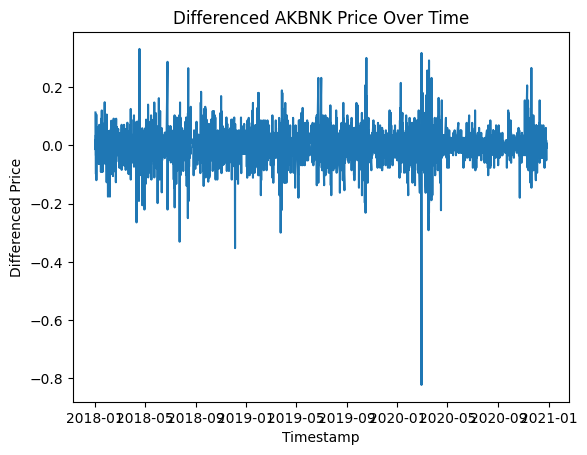

In [110]:
plt.plot(differenced_data_AKBNK.index, differenced_data_AKBNK)
plt.xlabel('Timestamp')
plt.ylabel('Differenced Price')
plt.title('Differenced AKBNK Price Over Time')
plt.show()

As we expected because of the ADF test, it looks stationary.

#### Applying Differencing to Achieve Stationarity in the Time Series of GARAN

In [111]:
differenced_data_GARAN = combined_data_GARAN['price'].diff().dropna()

### Testing Stationary

In [112]:
result_differenced_GARAN = adfuller(differenced_data_GARAN)
test_statistic_differenced_GARAN = result_differenced_GARAN[0]
p_value_differenced_GARAN = result_differenced_GARAN[1]

print(f'Test Statistic (GARAN Differenced): {test_statistic_differenced_GARAN}')
print(f'p-value (GARAN Differenced): {p_value_differenced_GARAN}')

if p_value_differenced_GARAN <= 0.05:
    print('The GARAN differenced time series is likely stationary.')
else:
    print('The GARAN differenced time series is likely non-stationary.')

Test Statistic (GARAN Differenced): -26.646266852830433
p-value (GARAN Differenced): 0.0
The GARAN differenced time series is likely stationary.


#### Plotting the differenced data for GARAN

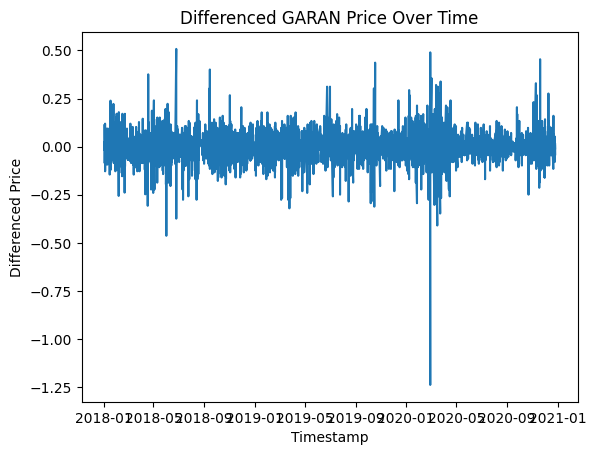

In [113]:
plt.plot(differenced_data_GARAN.index, differenced_data_GARAN)
plt.xlabel('Timestamp')
plt.ylabel('Differenced Price')
plt.title('Differenced GARAN Price Over Time')
plt.show()

As we expected because of the ADF test, it looks stationary. Now we can fit ARIMA models to these stationary time series.

#### Fit an ARIMA model for AKBNK

In [114]:
model = pm.auto_arima(differenced_data_AKBNK, seasonal=False, trace=True)

# Print the summary of the best model
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-26096.631, Time=0.48 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-26095.451, Time=0.15 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-26096.533, Time=0.22 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-26096.473, Time=0.25 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-26098.123, Time=0.41 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=-26095.209, Time=0.31 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-26093.859, Time=0.31 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=-26100.289, Time=0.51 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=-26100.010, Time=0.53 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=-26098.339, Time=1.07 sec
 ARIMA(1,0,4)(0,0,0)[0]             : AIC=-26098.824, Time=1.15 sec
 ARIMA(0,0,4)(0,0,0)[0]             : AIC=-26100.742, Time=0.94 sec
 ARIMA(0,0,5)(0,0,0)[0]             : AIC=-26098.993, Time=0.78 sec
 ARIMA(1,0,5)(0,0,0)[0]             : AIC=-26096.765, Time=0.98 sec
 ARIM

#### Fit an ARIMA model for GARAN

In [117]:
model = pm.auto_arima(differenced_data_GARAN, seasonal=False, trace=True)

# Print the summary of the best model
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-21103.170, Time=0.54 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-21104.338, Time=0.16 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-21102.658, Time=0.24 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-21102.651, Time=0.15 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-21100.655, Time=0.24 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-21102.345, Time=0.37 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0]          
Total fit time: 1.702 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 7440
Model:                        SARIMAX   Log Likelihood               10553.169
Date:                Sun, 10 Dec 2023   AIC                         -21104.338
Time:                        10:18:40   BIC                         -21097.423
Sample:                             0   HQIC                        -21101.96

In [119]:
# Fit an SARIMA model to the differenced_data_GARAN
model = pm.auto_arima(
    differenced_data_GARAN,
    seasonal=True,  # Enable seasonal modeling
    m=12,  # Seasonal period (e.g., 12 for monthly data)
    stepwise=True,  # Use stepwise search
    trace=True,  # Print progress
    suppress_warnings=True,  # Suppress warnings
    error_action="ignore",  # Ignore errors
    max_order=None,  # Maximum SARIMA order to consider
    out_of_sample_size=24,  # Number of hold-out samples for validation
    scoring="mse",  # Scoring method for model selection
)

# Print the summary of the best model
print(model.summary())

Performing stepwise search to minimize aic


c:\Users\EylülRanaSaraç\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\EylülRanaSaraç\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=-21096.249, Time=9.17 sec


c:\Users\EylülRanaSaraç\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\EylülRanaSaraç\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=-21102.345, Time=0.56 sec


c:\Users\EylülRanaSaraç\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\EylülRanaSaraç\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=-21099.586, Time=2.38 sec


c:\Users\EylülRanaSaraç\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\EylülRanaSaraç\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=-21099.590, Time=2.00 sec


c:\Users\EylülRanaSaraç\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\EylülRanaSaraç\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


 ARIMA(0,0,0)(0,0,0)[12]             : AIC=-21104.338, Time=0.39 sec


c:\Users\EylülRanaSaraç\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\EylülRanaSaraç\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


 ARIMA(0,0,0)(1,0,0)[12] intercept   : AIC=-21101.265, Time=1.06 sec


c:\Users\EylülRanaSaraç\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\EylülRanaSaraç\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


 ARIMA(0,0,0)(0,0,1)[12] intercept   : AIC=-21101.271, Time=1.42 sec


c:\Users\EylülRanaSaraç\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\EylülRanaSaraç\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=-21099.257, Time=1.65 sec


c:\Users\EylülRanaSaraç\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\EylülRanaSaraç\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=-21100.666, Time=1.42 sec


c:\Users\EylülRanaSaraç\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\EylülRanaSaraç\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=-21100.659, Time=0.45 sec


c:\Users\EylülRanaSaraç\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\EylülRanaSaraç\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=-21098.663, Time=1.35 sec

Best model:  ARIMA(0,0,0)(0,0,0)[12]          
Total fit time: 21.906 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 7440
Model:                        SARIMAX   Log Likelihood               10553.169
Date:                Sun, 10 Dec 2023   AIC                         -21104.338
Time:                        11:00:24   BIC                         -21097.423
Sample:                             0   HQIC                        -21101.962
                               - 7440                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0034   1.32e-05    260.683      0.000       0

In [ ]:
order_AKBNK = (1, 1, 1)
model_AKBNK = SARIMAX(differenced_data_AKBNK, order=order_AKBNK)
model_AKBNK_fit = model_AKBNK.fit()

# Print the fitted model summary for GARAN
print(model_AKBNK_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  price   No. Observations:                26121
Model:               SARIMAX(1, 1, 1)   Log Likelihood               13043.475
Date:                Sat, 09 Dec 2023   AIC                         -26080.950
Time:                        01:28:45   BIC                         -26056.439
Sample:                    01-02-2018   HQIC                        -26073.033
                         - 12-25-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0229      0.006     -4.049      0.000      -0.034      -0.012
ma.L1         -1.0000      0.002   -521.003      0.000      -1.004      -0.996
sigma2         0.0018   7.91e-06    221.824      0.0

#### Fit an ARIMA model for GARAN

In [ ]:
order_GARAN = (0, 1, 1)
model_GARAN = SARIMAX(differenced_data_GARAN, order=order_GARAN)
model_GARAN_fit = model_GARAN.fit()

# Print the fitted model summary for GARAN
print(model_GARAN_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  price   No. Observations:                26121
Model:               SARIMAX(0, 1, 1)   Log Likelihood               49524.896
Date:                Sat, 09 Dec 2023   AIC                         -99045.792
Time:                        01:29:49   BIC                         -99029.451
Sample:                    01-02-2018   HQIC                        -99040.514
                         - 12-25-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.5546      0.001   -461.777      0.000      -0.557      -0.552
sigma2         0.0013    1.3e-06   1011.962      0.000       0.001       0.001
Ljung-Box (L1) (Q):                   1.76   Jarque-

#### Make predictions for AKBNK

#### Make predictions for GARAN

#### Set up Control Limits for AKBNK According to the Forecast

#### Set up Control Limits for GARAN According to the Forecast